<h1>Data Analysis and Visualization </h1>


<h2>Read the data</h2>


In [317]:
import pandas as pd
import datetime as dt
import numpy as np

In [318]:
import warnings
warnings.filterwarnings('ignore')

In [319]:
#Add necessary imports and functions to read the data
# Data Link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
df = pd.read_csv('yellow_tripdata_small_2016-01.csv')

In [320]:
df = df.sample(1000)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,40.737690,1,9.5,1.0,0.5,2.26,0.0,0.3,13.56
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,40.741161,1,3.5,1.0,0.5,1.06,0.0,0.3,6.36
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,40.757027,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,40.772640,1,11.5,0.0,0.5,3.08,0.0,0.3,15.38
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,40.755615,1,22.5,0.0,0.5,4.65,0.0,0.3,27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124039,2,2016-01-15 09:12:02,2016-01-15 09:23:00,5,1.99,-73.954613,40.783798,1,N,-73.972458,40.759140,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96
1037075,1,2016-01-28 11:49:00,2016-01-28 11:54:48,1,0.50,-73.956871,40.774849,1,N,-73.958260,40.768887,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30
297401,1,2016-01-03 15:24:00,2016-01-03 15:42:53,1,5.40,0.000000,0.000000,1,N,0.000000,0.000000,2,19.0,0.0,0.5,0.00,0.0,0.3,19.80
470958,1,2016-01-07 09:23:19,2016-01-07 09:31:33,1,1.70,-73.980583,40.733898,1,N,-73.969505,40.749054,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15


<h2>Remove data outside the bounding box</h2>


In [321]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
pickup_filter = (df.pickup_longitude > westlimit) & (df.pickup_longitude <eastlimit) & (df['pickup_latitude'] >southlimit) & (df['pickup_latitude'] <northlimit)
dropoff_filter = ((df['dropoff_longitude'] > westlimit) & (df['dropoff_longitude'] < eastlimit) & (df['dropoff_latitude'] >southlimit) & (df['dropoff_latitude'] <northlimit))
df = df[pickup_filter]
df = df[dropoff_filter]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,40.737690,1,9.5,1.0,0.5,2.26,0.0,0.3,13.56
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,40.741161,1,3.5,1.0,0.5,1.06,0.0,0.3,6.36
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,40.757027,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,40.772640,1,11.5,0.0,0.5,3.08,0.0,0.3,15.38
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,40.755615,1,22.5,0.0,0.5,4.65,0.0,0.3,27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571618,2,2016-01-19 13:30:32,2016-01-19 13:45:11,2,0.78,-73.975616,40.755836,1,N,-73.981812,40.746681,1,10.0,0.0,0.5,2.70,0.0,0.3,13.50
124039,2,2016-01-15 09:12:02,2016-01-15 09:23:00,5,1.99,-73.954613,40.783798,1,N,-73.972458,40.759140,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96
1037075,1,2016-01-28 11:49:00,2016-01-28 11:54:48,1,0.50,-73.956871,40.774849,1,N,-73.958260,40.768887,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30
470958,1,2016-01-07 09:23:19,2016-01-07 09:31:33,1,1.70,-73.980583,40.733898,1,N,-73.969505,40.749054,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [322]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)


In [323]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [324]:
df['duration'] = df.duration.dt.seconds 
df.duration

294639      746
373110      129
96438       704
716960      940
778738     1445
           ... 
571618      879
124039      658
1037075     348
470958      494
444844      365
Name: duration, Length: 980, dtype: int64

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [325]:
df = df[df.duration < 10000]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,40.737690,1,9.5,1.0,0.5,2.26,0.0,0.3,13.56,746
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,40.741161,1,3.5,1.0,0.5,1.06,0.0,0.3,6.36,129
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,40.757027,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16,704
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,40.772640,1,11.5,0.0,0.5,3.08,0.0,0.3,15.38,940
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,40.755615,1,22.5,0.0,0.5,4.65,0.0,0.3,27.95,1445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571618,2,2016-01-19 13:30:32,2016-01-19 13:45:11,2,0.78,-73.975616,40.755836,1,N,-73.981812,40.746681,1,10.0,0.0,0.5,2.70,0.0,0.3,13.50,879
124039,2,2016-01-15 09:12:02,2016-01-15 09:23:00,5,1.99,-73.954613,40.783798,1,N,-73.972458,40.759140,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,658
1037075,1,2016-01-28 11:49:00,2016-01-28 11:54:48,1,0.50,-73.956871,40.774849,1,N,-73.958260,40.768887,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,348
470958,1,2016-01-07 09:23:19,2016-01-07 09:31:33,1,1.70,-73.980583,40.733898,1,N,-73.969505,40.749054,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15,494


<h2>Plot duration and compare with a gamma distribution</h2>

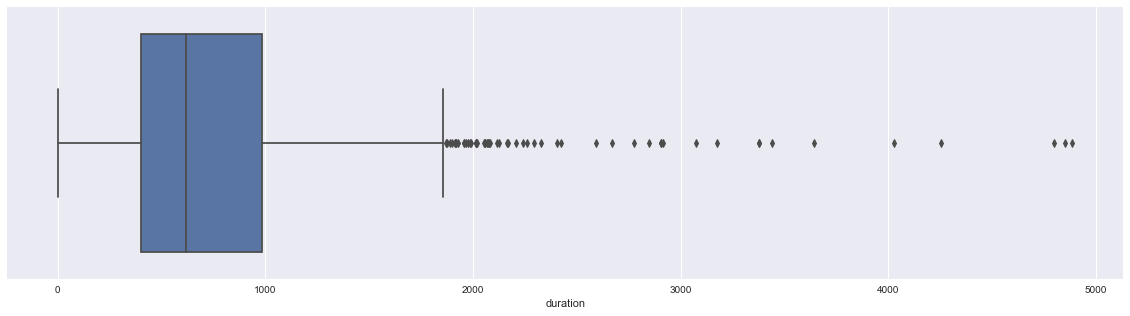

In [326]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
from scipy.stats import gamma
plt.style.use('seaborn')

plt.figure(figsize = (20,5))
sns.boxplot(df.duration)
plt.show()


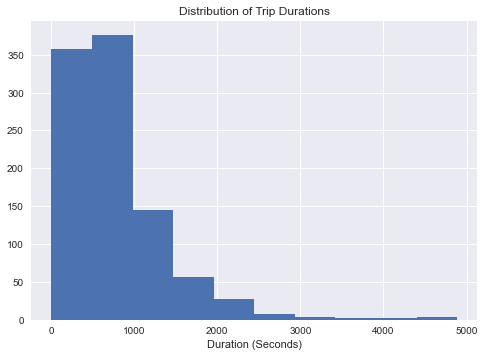

In [327]:
plt.hist(df.duration)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Seconds)')
plt.show()

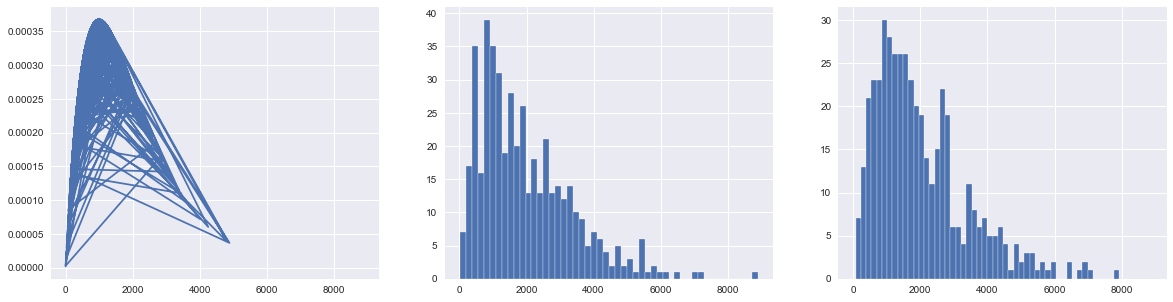

In [328]:
shape,scale = 2, 1000
Gamma = gamma(a = shape, scale = scale)
x = df.duration

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5), sharex = True)
ax[0].plot(x, Gamma.pdf(x));
ax[1].hist(Gamma.rvs(460), edgecolor = 'white', bins = 50);


samps = np.concatenate([Gamma.rvs(j) for j in [200, 200, 50 , 10]])
ax[2].hist(samps, edgecolor = 'white', bins = 50);

<h2>Plot the scatter plot between trip_distance and duration</h2>

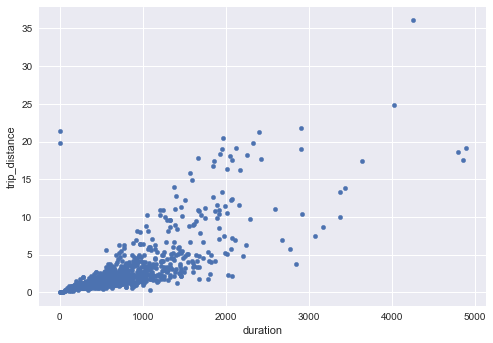

In [329]:
df.plot.scatter(x='duration', y='trip_distance');

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [330]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.weekday +1
df.head()
 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,...,1,9.5,1.0,0.5,2.26,0.0,0.3,13.56,746,3
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,...,1,3.5,1.0,0.5,1.06,0.0,0.3,6.36,129,5
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,...,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16,704,3
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,...,1,11.5,0.0,0.5,3.08,0.0,0.3,15.38,940,5
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,...,1,22.5,0.0,0.5,4.65,0.0,0.3,27.95,1445,4


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [331]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.pickup_hour

294639     18
373110     19
96438      20
716960     11
778738     13
           ..
571618     13
124039      9
1037075    11
470958      9
444844      9
Name: pickup_hour, Length: 980, dtype: int64

<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

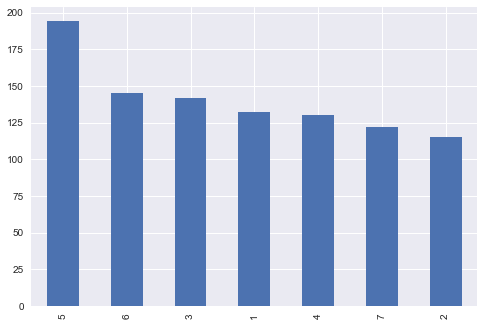

In [332]:
# Plotting days
df['day_of_week'].value_counts().plot(kind='bar');

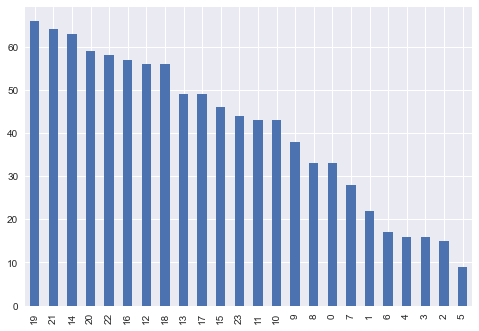

In [333]:
# Plotting hours 
df['pickup_hour'].value_counts().plot(kind='bar');

<h2>Create zones</h2>


<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<ol>
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ol>
    
    


Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [334]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    longs = np.linspace(westlimit, eastlimit, zone_factor +1 )
    lats = np.linspace(southlimit, northlimit, zone_factor +1 )
    index = 1
    for i in range(1,len(longs)):
        for j in range(1,len(lats)):
            zone_table.append([ str(index), [[[lats[j-1],longs[i-1]], [lats[j-1],longs[i]],[lats[j],longs[i]],[lats[j],longs[i-1]],  [lats[j-1],longs[i-1]]]]] )
            index+=1 
    return zone_table
zone_table = createZoneTable(20)


In [335]:

def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    
    #Your code goes here
    
    zone_data_dict_features = [{
    'geometry': {
        'coordinates': zone[1],
        'type': 'Polygon'},
    'properties' : {'zone_id': zone[0]},
    'type': 'Feature'

        } for zone in zone_table]
    zone_data_dict['features'] = zone_data_dict_features
    
    return zone_data_dict



Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [336]:
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)



In [337]:
lon, lat = -74.19, 40.65
for i, zone in enumerate(zone_table):
    zone_data = zone[1][0]
    south = zone_data[0][0]
    north = zone_data[2][0]
    west = zone_data[0][1]
    east = zone_data[1][1]
    bet_s_n = south < lat <= north
    bet_e_w = west < lon <= east
    if bet_e_w and bet_s_n:
        print(i)
    

    

46


<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [338]:
def get_zone(lon,lat,zone_table):
    
    #Your code goes here
    zone = -1
    for i, zones in enumerate(zone_table):
        zone_data = zones[1][0]
        south = zone_data[0][0]
        north = zone_data[2][0]
        west = zone_data[0][1]
        east = zone_data[1][1]
        bet_s_n = south < lat <= north
        bet_e_w = west < lon <= east
        if bet_e_w and bet_s_n:
            zone = i
    
    return zone



<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [339]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,...,9.5,1.0,0.5,2.26,0.0,0.3,13.56,746,3,18
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,...,3.5,1.0,0.5,1.06,0.0,0.3,6.36,129,5,19
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,...,10.5,0.5,0.5,2.36,0.0,0.3,14.16,704,3,20
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,...,11.5,0.0,0.5,3.08,0.0,0.3,15.38,940,5,11
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,...,22.5,0.0,0.5,4.65,0.0,0.3,27.95,1445,4,13


In [340]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'], zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'], zone_table),axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
294639,2,2016-01-27 18:50:23,2016-01-27 19:02:49,1,1.65,-73.988068,40.754890,1,N,-73.984070,...,0.5,2.26,0.0,0.3,13.56,746,3,18,211,210
373110,2,2016-01-15 19:44:22,2016-01-15 19:46:31,2,0.37,-73.994637,40.745499,1,N,-73.997749,...,0.5,1.06,0.0,0.3,6.36,129,5,19,210,210
96438,2,2016-01-13 20:28:58,2016-01-13 20:40:42,1,2.34,-73.983818,40.729706,1,N,-73.971313,...,0.5,2.36,0.0,0.3,14.16,704,3,20,210,231
716960,2,2016-01-22 11:15:35,2016-01-22 11:31:15,1,1.76,-73.981850,40.778091,1,N,-73.966873,...,0.5,3.08,0.0,0.3,15.38,940,5,11,232,232
778738,1,2016-01-21 13:39:21,2016-01-21 14:03:26,1,5.50,-74.011040,40.710510,1,N,-73.979790,...,0.5,4.65,0.0,0.3,27.95,1445,4,13,189,231


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [341]:
equal_zones_filt = df.pickup_zone == df.dropoff_zone
percentage = df[equal_zones_filt].shape[0]/df.shape[0]

percentage * 100


22.040816326530614

In [342]:
highest_pickup_zone =  df.pickup_zone.value_counts().index.to_list()[0]
pickup_number = list(df.pickup_zone.value_counts().values)[0]

highest_dropoff_zone =  df.dropoff_zone.value_counts().index.to_list()[0]
dropoff_number = list(df.dropoff_zone.value_counts().values)[0]


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour

    

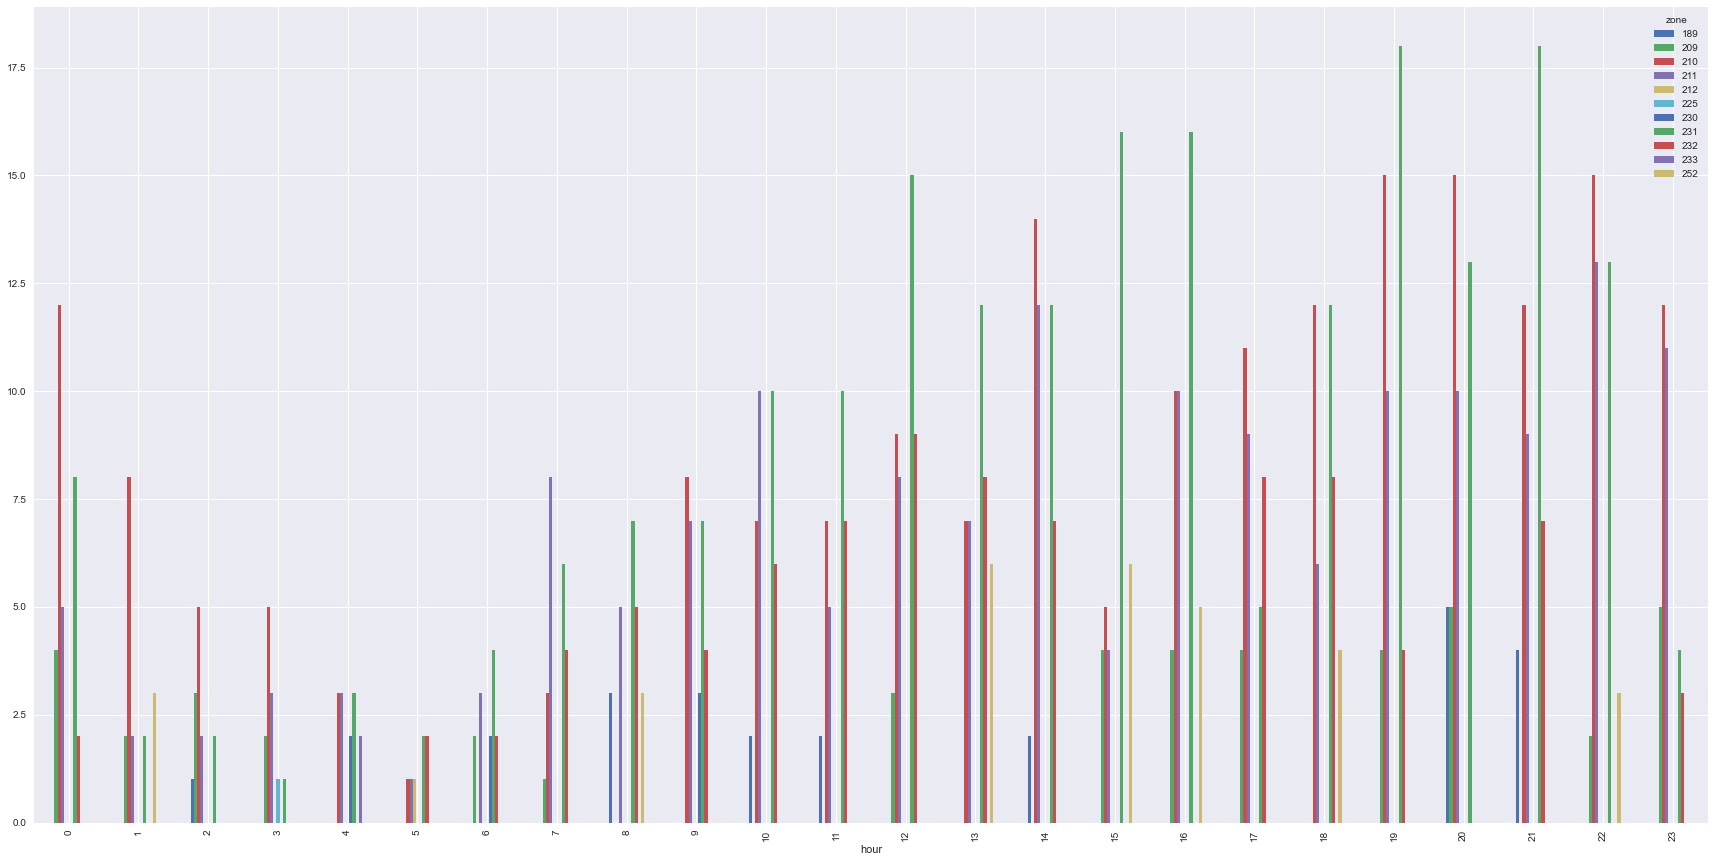

In [343]:
zone_hour_df = df.groupby(['pickup_hour', 'pickup_zone']).count()
columns = ['hour', 'zone', 'amount']
data_list = []
cur = ''
for i, zh in enumerate(zone_hour_df.index):
    hour = zone_hour_df.loc[zh[0]]

    list_hrs = list(zip(hour.index,hour.VendorID.values))
    list_hrs.sort( key= lambda x: x[1], reverse = True)

    if cur != list_hrs[:5]:
        cur = list_hrs[:5]
        for c in cur:
            data_list.append([zh[0], c[0], c[1]])

new_df = pd.DataFrame(data_list, columns = columns)
new_df.pivot(index='hour', columns='zone', values='amount').plot(kind='bar', figsize = (30,15));

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

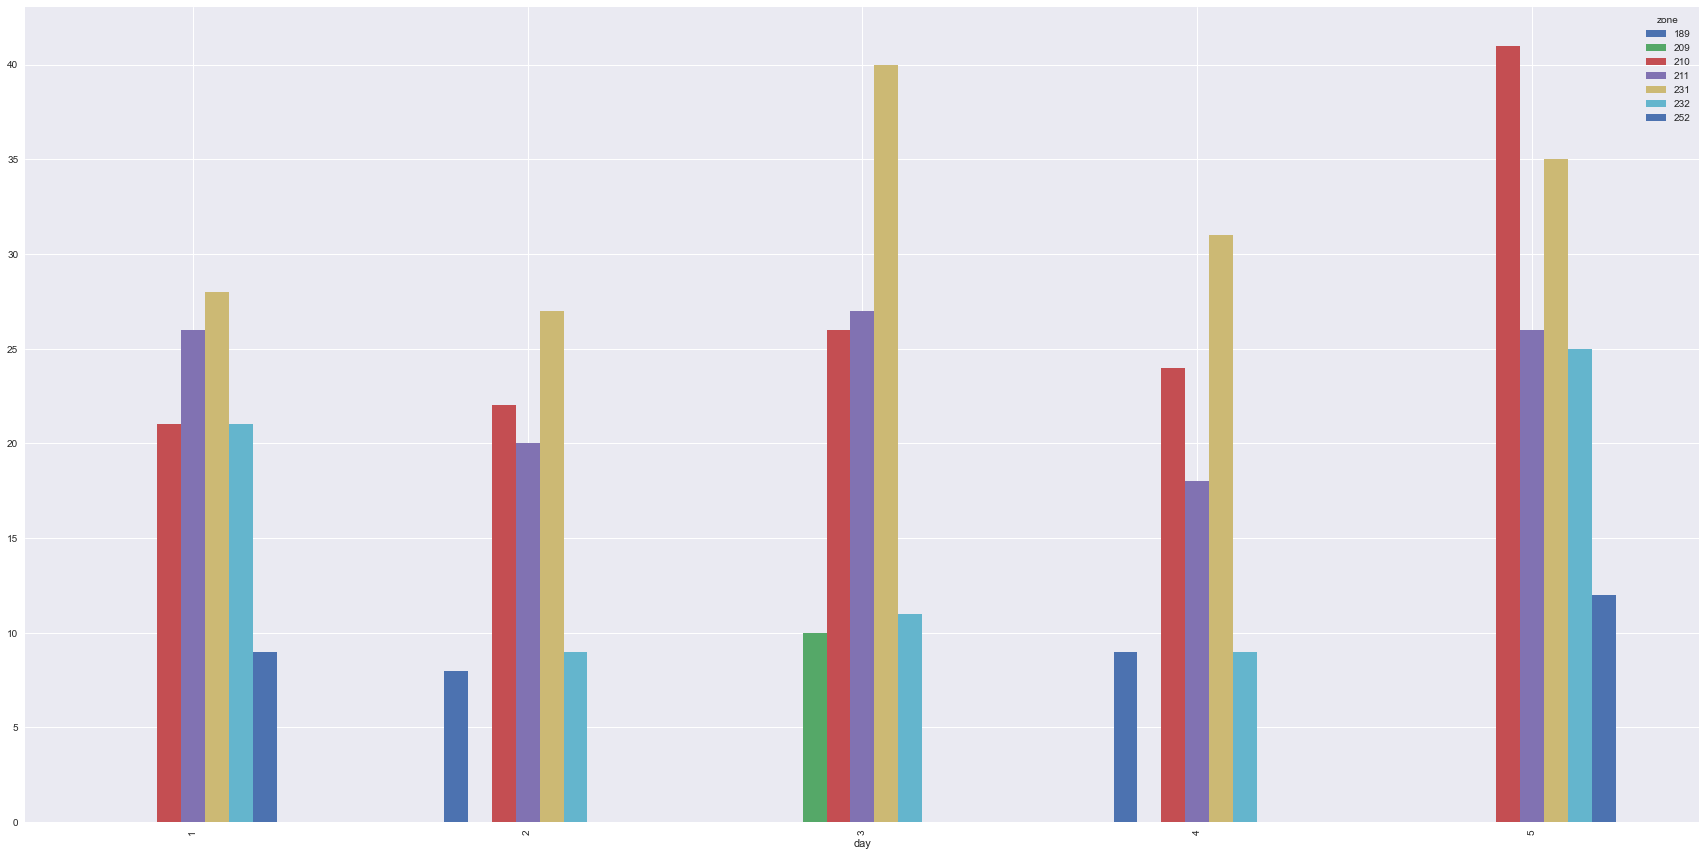

In [344]:
df.head()
day_filter = df.day_of_week < 6
zone_day_df = df[day_filter].groupby(['day_of_week', 'pickup_zone']).count()
columns = ['day', 'zone', 'amount']
data_list = []
cur = ''
for i, zd in enumerate(zone_day_df.index):
    hour = zone_day_df.loc[zd[0]]

    list_days = list(zip(hour.index,hour.VendorID.values))
    list_days.sort( key= lambda x: x[1], reverse = True)

    if cur != list_days[:5]:
        cur = list_days[:5]
        for c in cur:
            data_list.append([zd[0], c[0], c[1]])

new_df = pd.DataFrame(data_list, columns = columns)
new_df.pivot(index='day', columns='zone', values='amount').plot(kind='bar', figsize = (30,15));

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [345]:
morning_filt = (df.pickup_hour == 8) & (df.day_of_week < 6)
df[morning_filt].pickup_zone.value_counts()


231    6
211    5
232    4
252    3
189    3
230    1
233    1
212    1
312    1
251    1
Name: pickup_zone, dtype: int64

In [346]:
# the most frequent pickup zone between 8 am and 9 am on a weekday
top_zone = df[morning_filt].pickup_zone.value_counts().index[0]
top_zone

231

<h2>Mapping</h2>
<li>Draw a folium map using the polygon
    
    
    geojson object and the counts dataframe (see class example)

In [347]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [348]:
data = list(df[['pickup_longitude', 'pickup_latitude']].to_records(index=False))
data = list(map(list, data))


m = folium.Map([westlimit, northlimit], tiles = 'OpenStreetMap', zoom_start=8)

HeatMap(data).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

m

In [349]:
m.save("index.html")